##### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as stat
import numpy as np

#### Loading the dataset

In [2]:
pd.set_option('precision', 4)

pen = pd.read_csv('penguins_lter.csv')
pen.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.9496,-24.6945,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.3682,-25.3330,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.7665,-25.3243,NaN


### About this Dataset

The penguins dataset contains 344 rows and 17 features (columns).

The dataset has following numerical columns - 'Sample Number','Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)' and

Categorical columns - studyName','Clutch Completion','Region','Stage','Island','Individual ID',
                        'Date Egg','Sex','Comments'

Target variable - Species having three classes (Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua))

Objective: To classify each sample into types of species based on its attributes


#### Dataset characteristics

In [3]:
pen.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.0000,342.0000,342.0000,342.0000,342.0000,330.0000,331.0000
mean,63.1512,43.9219,17.1512,200.9152,4201.7544,8.7334,-25.6863
std,40.4302,5.4596,1.9748,14.0617,801.9545,0.5518,0.7940
min,1.0000,32.1000,13.1000,172.0000,2700.0000,7.6322,-27.0185
25%,29.0000,39.2250,15.6000,190.0000,3550.0000,8.2999,-26.3203
50%,58.0000,44.4500,17.3000,197.0000,4050.0000,8.6524,-25.8335
75%,95.2500,48.5000,18.7000,213.0000,4750.0000,9.1721,-25.0620
max,152.0000,59.6000,21.5000,231.0000,6300.0000,10.0254,-23.7877


In [4]:
#checking for null values in the data

pen.isnull().sum() 

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

### Data Cleaning and transform

In [5]:
pen.tail(10)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
334,PAL0910,115,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N35A1,Yes,11/25/09,46.2,14.1,217.0,4375.0,FEMALE,8.3023,-25.9601,NaN
335,PAL0910,116,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N35A2,Yes,11/25/09,55.1,16.0,230.0,5850.0,MALE,8.0835,-26.1816,NaN
336,PAL0910,117,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N36A1,Yes,12/1/09,44.5,15.7,217.0,4875.0,.,8.0411,-26.1844,NaN
337,PAL0910,118,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N36A2,Yes,12/1/09,48.8,16.2,222.0,6000.0,MALE,8.3383,-25.8855,NaN
338,PAL0910,119,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,12/1/09,47.2,13.7,214.0,4925.0,FEMALE,7.9918,-26.2054,NaN
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.4115,-26.1383,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.3017,-26.0412,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.2425,-26.1197,NaN
343,PAL0910,124,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A2,Yes,11/22/09,49.9,16.1,213.0,5400.0,MALE,8.3639,-26.1553,NaN


In row no. 336, column name -Sex having bad data (.), replacing that with the NaN value

In [6]:
pen['Sex'] = pen['Sex'].replace('.',np.nan)

#### Filling in all the null values with mean value of their columns

In [7]:
pen['Culmen Length (mm)'].fillna(pen['Culmen Length (mm)'].mean(),inplace=True)
pen['Culmen Depth (mm)'].fillna(pen['Culmen Depth (mm)'].mean(),inplace=True)
pen['Flipper Length (mm)'].fillna(pen['Flipper Length (mm)'].mean(),inplace=True)
pen['Body Mass (g)'].fillna(pen['Body Mass (g)'].mean(),inplace=True)
pen['Delta 15 N (o/oo)'].fillna(pen['Delta 15 N (o/oo)'].mean(),inplace=True)
pen['Delta 13 C (o/oo)'].fillna(pen['Delta 13 C (o/oo)'].mean(),inplace=True)

In [8]:
pen['Sex'] = (pen['Sex'].fillna('MALE')) # filling in with 'Male' as it is mode of that column

In [9]:
pen.info() #no null values in the data except comments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   344 non-null    float64
 10  Culmen Depth (mm)    344 non-null    float64
 11  Flipper Length (mm)  344 non-null    float64
 12  Body Mass (g)        344 non-null    float64
 13  Sex                  344 non-null    object 
 14  Delta 15 N (o/oo)    344 non-null    float64
 15  Delta 13 C (o/oo)    344 non-null    flo

#### Checking for the unique values in the categorical data

In [10]:
col = ['studyName','Species','Region','Island','Stage','Clutch Completion','Date Egg','Sex']
for item in col:
    print('unique values of {} = {}'.format(item,pen[item].unique()))

unique values of studyName = ['PAL0708' 'PAL0809' 'PAL0910']
unique values of Species = ['Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)']
unique values of Region = ['Anvers']
unique values of Island = ['Torgersen' 'Biscoe' 'Dream']
unique values of Stage = ['Adult, 1 Egg Stage']
unique values of Clutch Completion = ['Yes' 'No']
unique values of Date Egg = ['11/11/07' '11/16/07' '11/15/07' '11/9/07' '11/12/07' '11/10/07'
 '11/13/07' '11/19/07' '11/6/08' '11/9/08' '11/15/08' '11/13/08'
 '11/11/08' '11/14/08' '11/8/08' '11/2/08' '11/7/08' '11/17/08' '11/5/08'
 '11/10/08' '11/9/09' '11/15/09' '11/20/09' '11/12/09' '11/17/09'
 '11/18/09' '11/22/09' '11/16/09' '11/21/09' '11/23/09' '11/10/09'
 '11/13/09' '11/14/09' '11/26/07' '11/21/07' '11/28/07' '11/22/07'
 '11/30/07' '12/3/07' '11/25/08' '11/24/08' '11/27/09' '11/19/09'
 '11/27/07' '11/18/07' '11/29/07' '11/4/08' '11/3/08' '11/25/09' '12/1/09']
unique values of Sex = 

### converting the categorical attributes into numerical format (Label Encoding)

In [11]:
pen['studyName'] = pen['studyName'].replace({'PAL0708':0,'PAL0809':1,'PAL0910':2})
pen['Island'] = pen['Island'].replace({'Torgersen':0,'Biscoe':1,'Dream':2})
pen['Clutch Completion'] = pen['Clutch Completion'].replace({'Yes':0,'No':1})
pen['Species'] = pen['Species'].replace({'Adelie Penguin (Pygoscelis adeliae)':0,
                                         'Chinstrap penguin (Pygoscelis antarctica)':1,
                                         'Gentoo penguin (Pygoscelis papua)':2})
pen['Sex'] = pen['Sex'].replace({'MALE':0,'FEMALE':1})

In order to check whether a categorical attributes are predictors or not, assigned a arbitary values to the following categorical attributes - Sex, studyName, Species, Istand and clutch completion. The columns- Region, Stage are having single value and Individual Id, Date egg having multiple values and comments column doesnt impact are excluded from this analysis.

<AxesSubplot:>

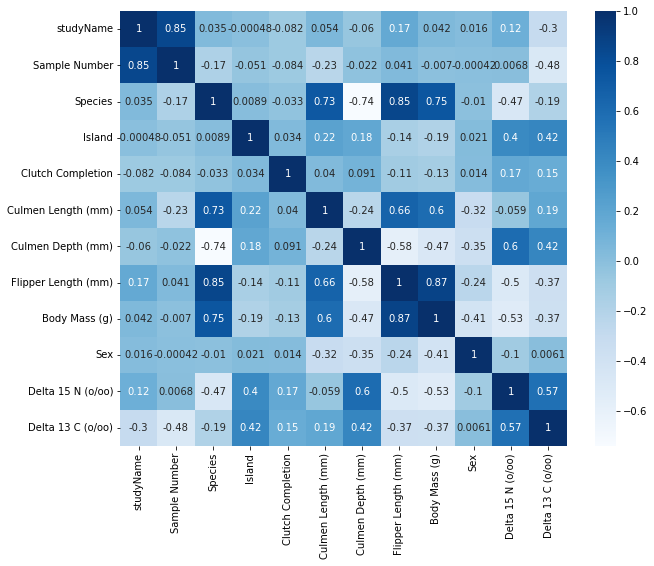

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = pen[pen.columns].corr()
sns.heatmap(corr, annot = True,cmap='Blues')

From above Heat map, can see the columns - studyname, Island, clutch completion, Sex have very little correlation with Species, so we can ignore those for the further analysis. 

### Removing all the other attributes

In [13]:
df1 = pen.drop(columns=['studyName','Clutch Completion','Region','Stage','Island','Individual ID',
                        'Date Egg','Sex','Comments'])
df1

,Sample Number,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1,0,39.1000,18.7000,181.0000,3750.0000,8.7334,-25.6863
1,2,0,39.5000,17.4000,186.0000,3800.0000,8.9496,-24.6945
2,3,0,40.3000,18.0000,195.0000,3250.0000,8.3682,-25.3330
3,4,0,43.9219,17.1512,200.9152,4201.7544,8.7334,-25.6863
4,5,0,36.7000,19.3000,193.0000,3450.0000,8.7665,-25.3243
...,...,...,...,...,...,...,...,...
339,120,2,43.9219,17.1512,200.9152,4201.7544,8.7334,-25.6863
340,121,2,46.8000,14.3000,215.0000,4850.0000,8.4115,-26.1383
341,122,2,50.4000,15.7000,222.0000,5750.0000,8.3017,-26.0412
342,123,2,45.2000,14.8000,212.0000,5200.0000,8.2425,-26.1197


In [14]:
df1['Species'] = df1['Species'].replace({0:'Class_0',1:'Class_1',2:'Class_2'})

replacing the species column values (0,1,2) with  - Class 0, Class 1 and Class 2

### Visualize the data

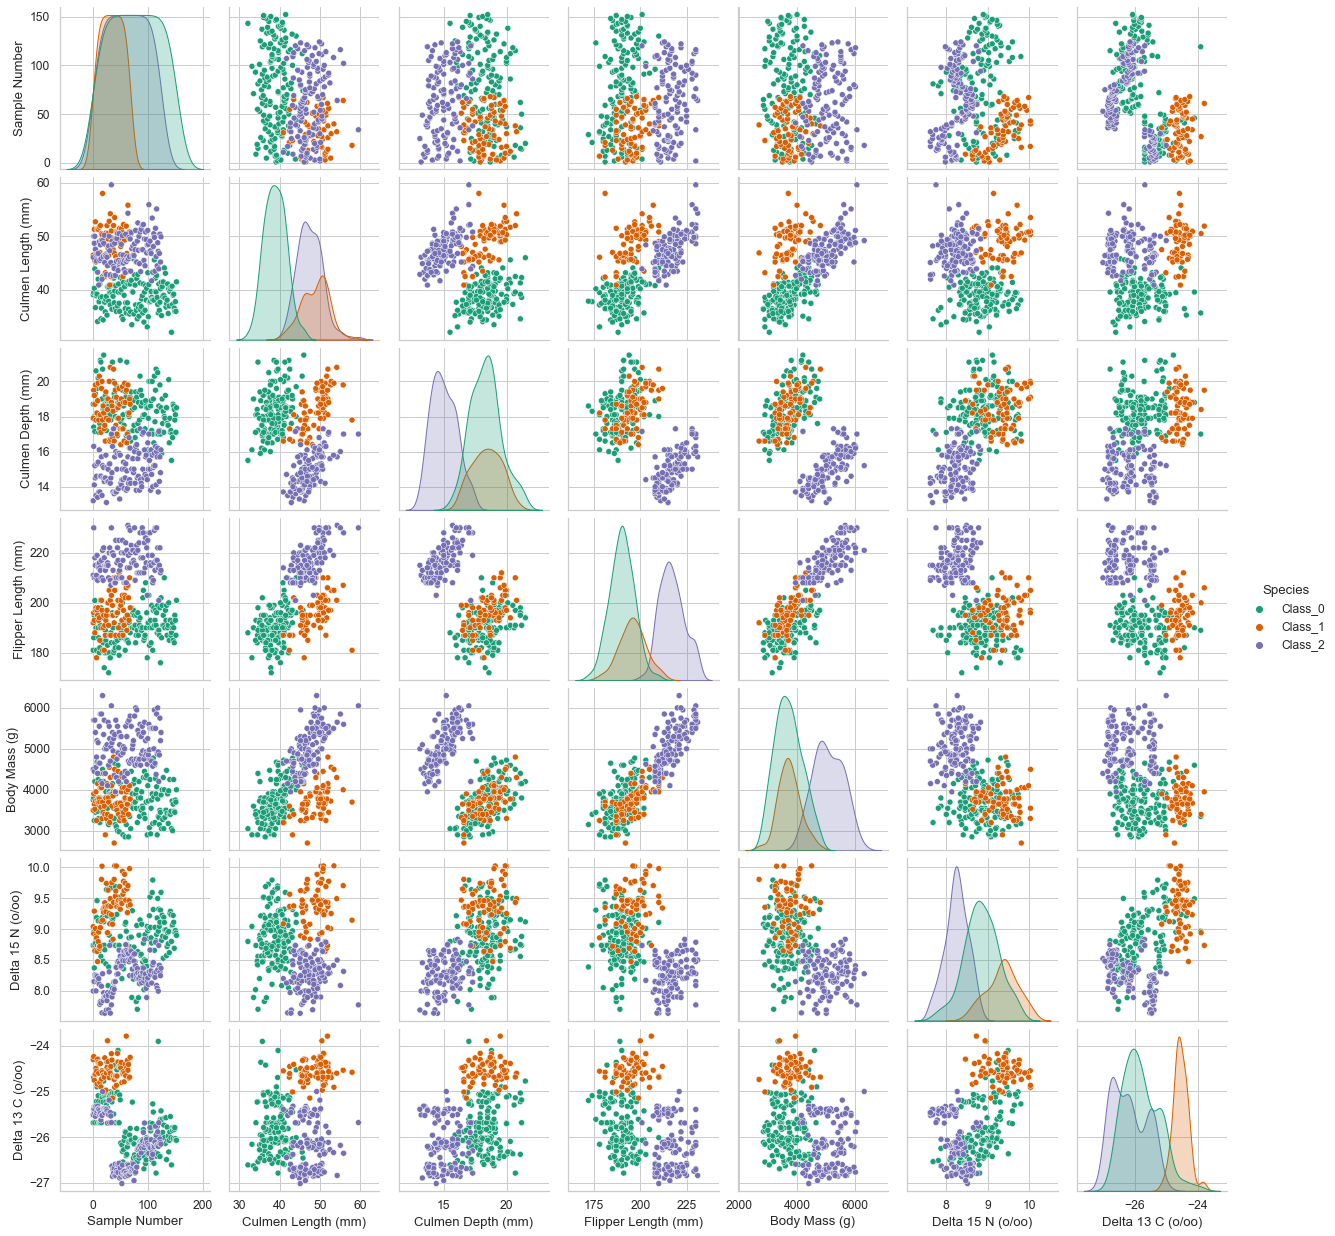

In [15]:
sns.set(font_scale=1.1)
sns.set_style('whitegrid')

sns.pairplot(df1, hue='Species',palette='Dark2')

<strong><font color = 'navy'>Observations from above pair plots with target variable (Species):
    
1. From the above plots, shows the relationship between the variables, snd can see the three classes are not disconnected from each other, with the help of hue-species.

2. we can actually see the formation of three clusters, some of the attributes such as Sample number, Delta 13 are poor predictors of the class.

3. Whereas, some of the attributes- Flipper length, Cumen length, boday mass are relatively good predictors of the class.

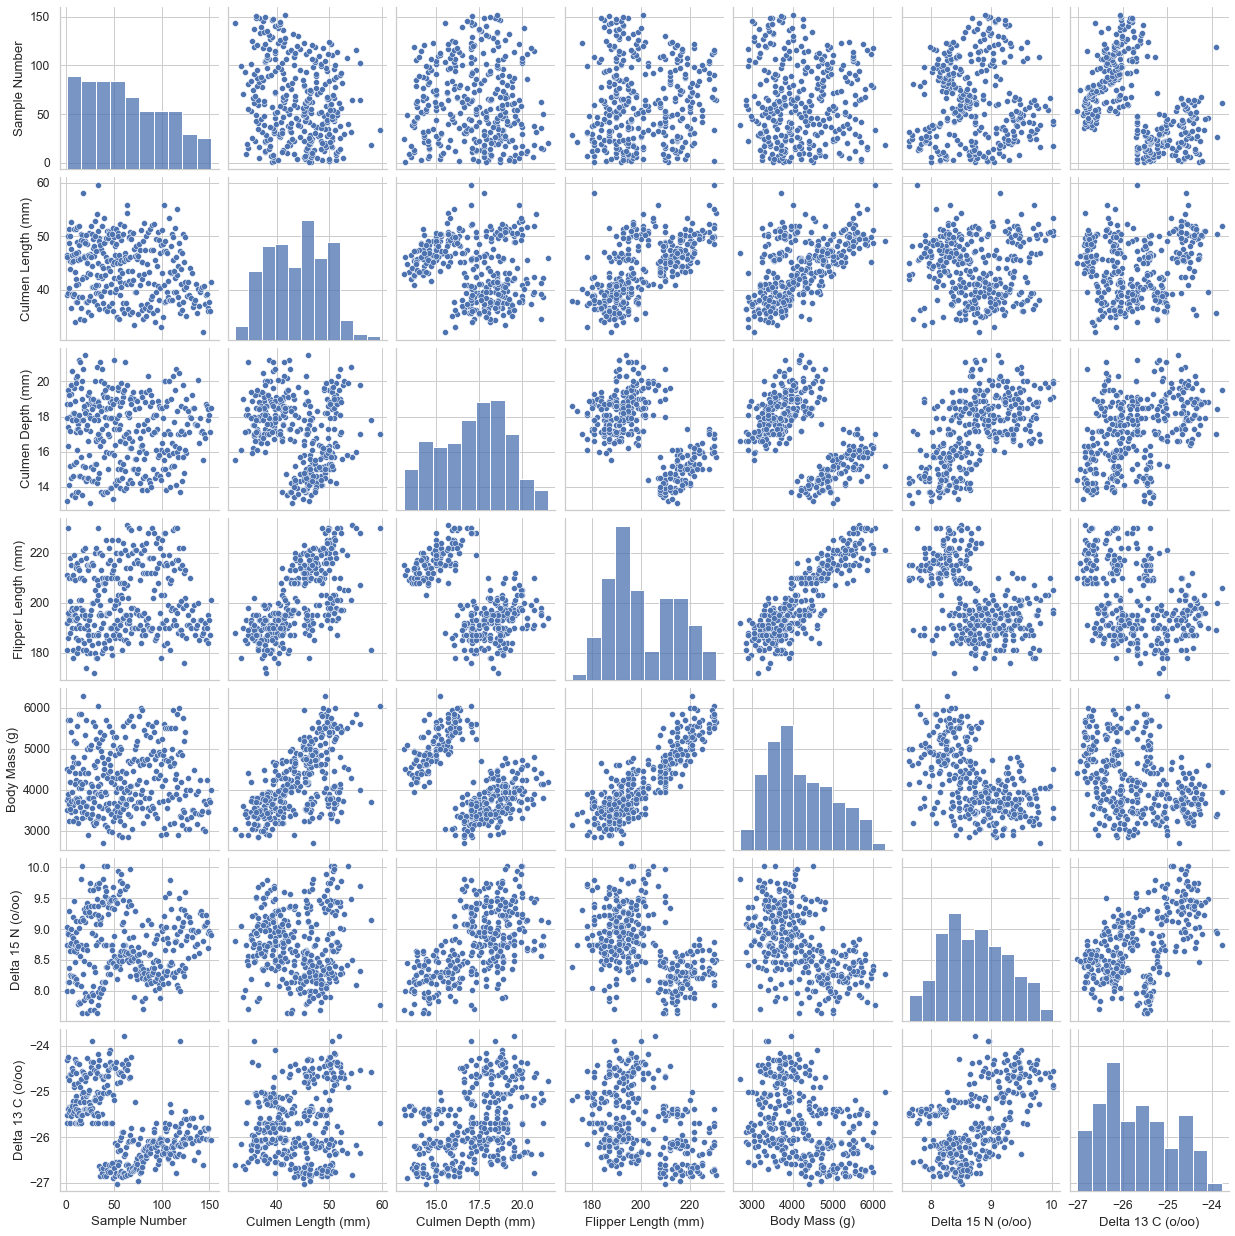

In [16]:
sns.pairplot(df1)

<strong><font color = 'navy'>Observation from above pair plot, without the target variable (species):

1. From the above pairplots, we can see without the hue (species) it is hard to find the three clusters. 
2. With some attributes such as Cumen Depth, Flipper Length, Body Mass, Delta, we can spot two clusters from the data.

In [17]:
df2 = df1.copy()
df2 = df1.drop(columns = ['Species'])
df2

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1,39.1000,18.7000,181.0000,3750.0000,8.7334,-25.6863
1,2,39.5000,17.4000,186.0000,3800.0000,8.9496,-24.6945
2,3,40.3000,18.0000,195.0000,3250.0000,8.3682,-25.3330
3,4,43.9219,17.1512,200.9152,4201.7544,8.7334,-25.6863
4,5,36.7000,19.3000,193.0000,3450.0000,8.7665,-25.3243
...,...,...,...,...,...,...,...
339,120,43.9219,17.1512,200.9152,4201.7544,8.7334,-25.6863
340,121,46.8000,14.3000,215.0000,4850.0000,8.4115,-26.1383
341,122,50.4000,15.7000,222.0000,5750.0000,8.3017,-26.0412
342,123,45.2000,14.8000,212.0000,5200.0000,8.2425,-26.1197


## Unsupervised Machine Learning

### Create a k-means estimator and fit the model

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=11)  # find three clusters
kmeans.fit(df2)

KMeans(n_clusters=3, random_state=11)

In [19]:
print(kmeans.labels_[0:114])

[0 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 2 0 0 0 2 0 2 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 2 0 0 0 2
 0 2 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0
 2 0 2]


In [20]:
print(kmeans.labels_[114:229]) 

[0 2 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0
 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 2 0 0
 0 2 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 2 0 2 1 2 1 1
 2 2 1 2]


In [21]:
print(kmeans.labels_[229:344])  

[1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2 1 0 1 2 2 1 2
 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 1 1 2 1 2 1 2 2 2 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 2
 2 1 1 1]


In [22]:
df1['predicted_class'] = kmeans.labels_[0:344]
df1[['Species','predicted_class']].value_counts()

Species  predicted_class
Class_0  0                  112
Class_2  1                   70
         2                   53
Class_1  0                   52
Class_0  2                   40
Class_1  2                   16
Class_2  0                    1
dtype: int64

From the above table, we can see the actual class and the predicted class values, the clusters here are formed based on the given data and attributes. The predicted class values may not be formed as exactly as the actual class. 

We can see that, Actual Class_0 contains 205 values where as predicted class 0 has 165 values, actual Class_1 having 68 values where as predicted class 1 has 70 values, and actual Class_2 having 71 values where as predicted class 2 has 109 values.

### Create a TSNE Estimator to reduce the data to two dimensions

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=11)
reduced_data = tsne.fit_transform(df2)

print(f'Reduced data shape: reduced_digits.shape = {reduced_data.shape}')

Reduced data shape: reduced_digits.shape = (344, 2)


Here, the 7 attributes which used to predict the species class got reduced to 2 columns. 

### Visualize the reduced data

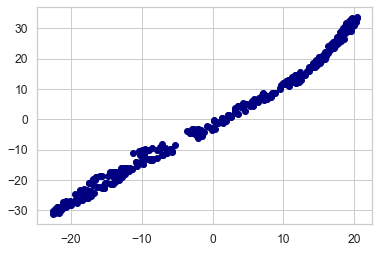

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='navy')

### Visualize the reduced data with a different color for each class (0,1,2)

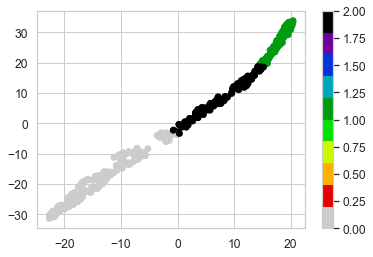

In [25]:
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c= df1['predicted_class'],
                   cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

colorbar = plt.colorbar(dots)

The above plot shows the reduced features against the cluster classes - 0,1,2


### Dimensionality reduction with Principal Component Analysis (PCA)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=11)  # reduce to two components
pca.fit(df2)

PCA(n_components=2, random_state=11)

In [27]:
reduced_df = pca.transform(df2)
reduced_df.shape

(344, 2)

Here, the 7 attributes which used to predict the species class got reduced to 2 columns.

### Visualize the reduced data

In [28]:
reduced_pen_df = pd.DataFrame(reduced_df, 
                               columns=['Component 1', 'Component 2'])
reduced_pen_df['Species'] = df1['Species']
reduced_pen_df['predicted_class'] = df1['predicted_class']

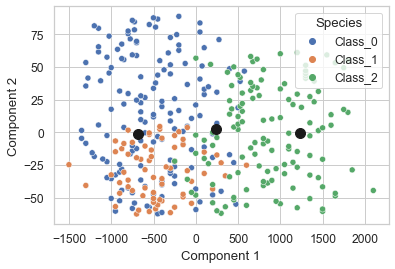

In [29]:
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=reduced_pen_df, hue='Species', legend='brief', 
                       x='Component 1', y='Component 2') 

pen_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(pen_centers[:,0], pen_centers[:,1], s=100, c='k')

The above plot shows the distribution of the reduced features against the cluster centers

## Supervised Machine Learning
### k-NearestNeighbors
### Split the data for training and testing

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, df1['predicted_class'], random_state=11)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (258, 7)
X_test.shape  = (86, 7)

y_train.shape = (258,)
y_test.shape  = (86,)


### Create and train the k-nearest neighbors model

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X=X_train, y=y_train) 

KNeighborsClassifier(n_neighbors=3)

### Test the model

In [32]:
predicted = knn.predict(X=X_test)
expected = y_test

In [33]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[(2, 0)]


### Model prediction accuracy

In [34]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 98.84%


### Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[38  0  1]
 [ 0 17  0]
 [ 0  0 30]]


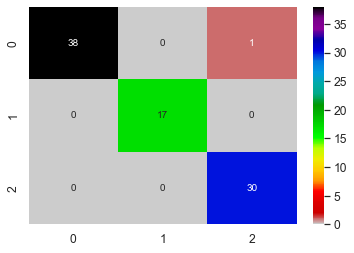

In [36]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(3), columns=range(3))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

From the above Confusion Matrix, we can see that all the class 1 and class 2 were correctly predicted and one of class 0 is wrongly predicted as class 2 species. 

### Classification report

In [37]:
from sklearn.metrics import classification_report

print('CLASSIFICATION REPORT\n')
print(classification_report(expected, predicted))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       1.00      1.00      1.00        17
           2       0.97      1.00      0.98        30

    accuracy                           0.99        86
   macro avg       0.99      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



<strong><font color = 'navy'>Classification report summary:

We can see from the above report, class 0 and class 1 are with 100% precision and class 2 is 97% precision. 

## Comparing the classifications with original labels

Now, building a model that predicts based on the Species class as target instead of the clustered -Predicted class as target

### Split the data for training and testing

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df2, df1['Species'], random_state=11)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (258, 7)
X_test.shape  = (86, 7)

y_train.shape = (258,)
y_test.shape  = (86,)


### Create and train the k-nearest neighbors model

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X=X_train, y=y_train) 

KNeighborsClassifier(n_neighbors=3)

### Test the model

In [40]:
predicted = knn.predict(X=X_test)
expected = y_test

In [41]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]


print('Wrong predictions:')
print(wrong)

Wrong predictions:
[('Class_0', 'Class_1'), ('Class_0', 'Class_2'), ('Class_0', 'Class_1'), ('Class_0', 'Class_2'), ('Class_0', 'Class_2'), ('Class_0', 'Class_1'), ('Class_1', 'Class_0'), ('Class_0', 'Class_1'), ('Class_1', 'Class_0'), ('Class_0', 'Class_1'), ('Class_0', 'Class_1'), ('Class_0', 'Class_2'), ('Class_2', 'Class_1'), ('Class_1', 'Class_0'), ('Class_0', 'Class_2'), ('Class_0', 'Class_2'), ('Class_0', 'Class_1'), ('Class_0', 'Class_1'), ('Class_1', 'Class_0'), ('Class_0', 'Class_2'), ('Class_0', 'Class_2'), ('Class_0', 'Class_2'), ('Class_2', 'Class_0'), ('Class_2', 'Class_0'), ('Class_0', 'Class_2'), ('Class_0', 'Class_1'), ('Class_1', 'Class_0'), ('Class_1', 'Class_0')]


### Model prediction accuracy

In [42]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 67.44%


### Confusion Matrix and Classification report

In [43]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)
print()
print()

print('CLASSIFICATION REPORT')
print(classification_report(expected, predicted))

Confusion matrix:
[[25  6  2]
 [ 9  8  1]
 [10  0 25]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Class_0       0.57      0.76      0.65        33
     Class_1       0.57      0.44      0.50        18
     Class_2       0.89      0.71      0.79        35

    accuracy                           0.67        86
   macro avg       0.68      0.64      0.65        86
weighted avg       0.70      0.67      0.68        86



<strong><font color = 'navy'>Classification report summary:

We can see from the classification report, the accuracy of the model when trying to predict with the actual Species (target variable) is less when compared to the predicted class that is 67.4%. 

From the confusion matrix, can see 28 instances are wrongly classified, Class 0 being 8, Class 1 - 10 and Class 2 -10 instances. 

class 0 and class 1 are with 57% precision and class 2 is 89% precision.

The model is better at classifying the data based on the cluster predicted class formed than the actual Species class.

### Further experiments from the dataset

The given data is experimented by labelling the data to a new class based on Flipper length column attribute, which is having set of values (25%,50% and 70%) is classified than the originally classified datapoints.

In [44]:
# Labelling data based on the other attributes and classifying them than the originally classified data

conditions = [(pen['Flipper Length (mm)']>0)& (pen['Flipper Length (mm)']<=190.00),
              (pen['Flipper Length (mm)']>190.00) & (pen['Flipper Length (mm)']<=197.00),
              (pen['Flipper Length (mm)']>197.00) & (pen['Flipper Length (mm)']<=213.00),
             ]

values = ['class0','class1','class2']

df1['new_class'] = np.select(conditions,values)

df1.head()

,Sample Number,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),predicted_class,new_class
0,1,Class_0,39.1000,18.7000,181.0000,3750.0000,8.7334,-25.6863,0,class0
1,2,Class_0,39.5000,17.4000,186.0000,3800.0000,8.9496,-24.6945,0,class0
2,3,Class_0,40.3000,18.0000,195.0000,3250.0000,8.3682,-25.3330,0,class1
3,4,Class_0,43.9219,17.1512,200.9152,4201.7544,8.7334,-25.6863,2,class2
4,5,Class_0,36.7000,19.3000,193.0000,3450.0000,8.7665,-25.3243,0,class1


We can further do the analysis of model fit, accuracy from the new_class column.

<strong><font color = 'navy'>Report summary:

From the above analysis, can see that the model is better at classifying the data based on the cluster predicted class formed than the actual Species class. 

The accuracy for the cluster predicted class - 98.8% where as for the actual species class is 67.4%.
    
From the predicted class classification report, can see class 0 and class 1 are with 100% precision and class 2 is 97% precision where as, from the actual class report, class 0 and class 1 are with 57% precision and class 2 is 89% precision is maximum we get there. 
    
And, The given data is experimented by labelling the data to a new class based on Flipper length column attribute, is classified than the originally classified datapoints.

